# EDA, FE and Logistic Regression Model (Breast Cancer Dataset)


**Model on Heroku:** https://bcancerprediction.herokuapp.com/

**For the code please check out my Machine Learning repository on GitHub**

### 1. EDA and FE
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis
4. Data Cleaning
5. Data Scaling

### 2. Logistic Regression Model (Classification)
1. Logistic Regression Model
2. Performance metrics for above model

**Dataset:** https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

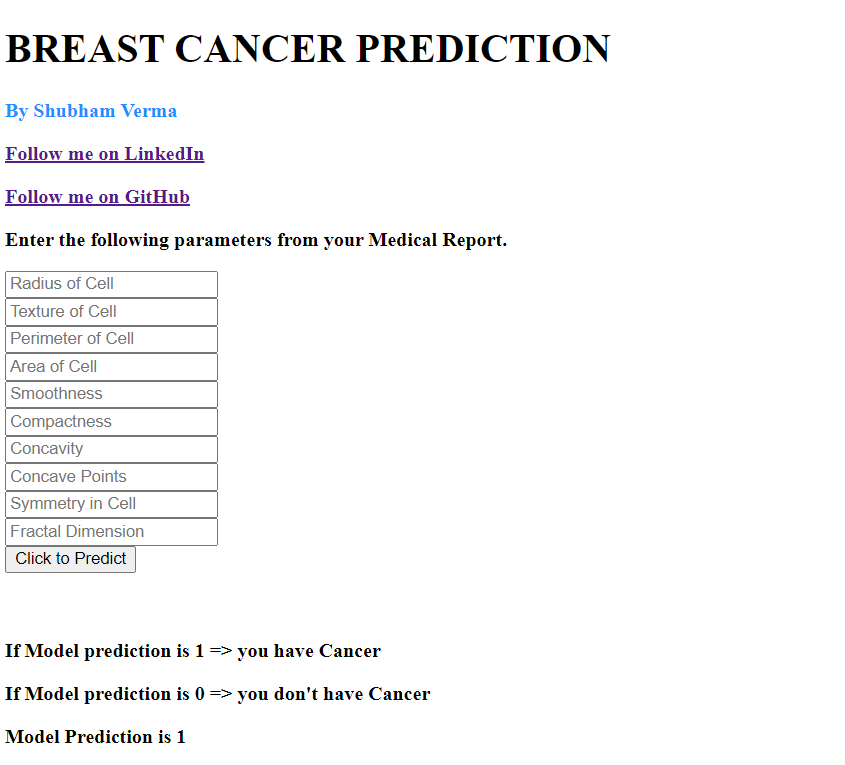

In [2]:
from IPython import display
display.Image("BreastCancerModel.png")

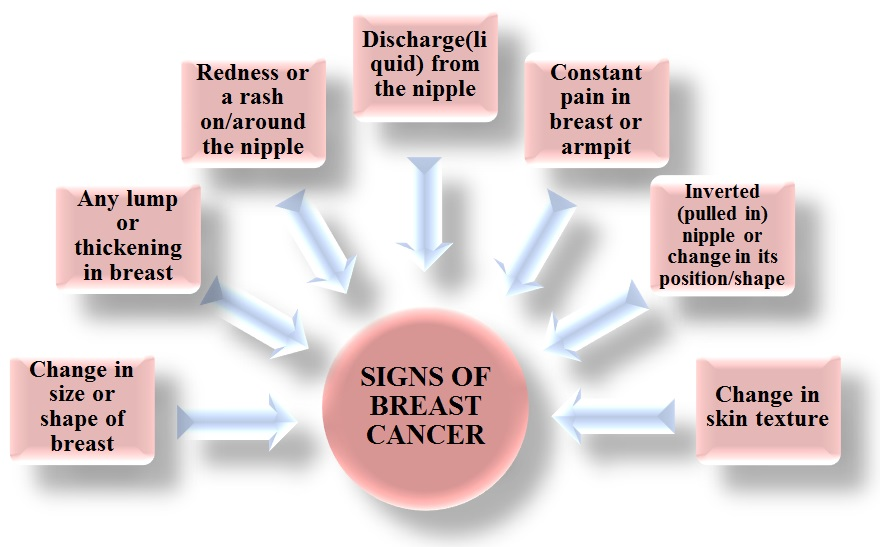

In [1]:
from IPython import display
display.Image("Signs.jpg")

## <span style='color:red '>1.0 Importing required libraries</span>

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

In [2]:
dataset=pd.read_csv('Breast Cancer Diagnostic.csv')
dataset.head()

ID number  radius  texture  perimeter    area  smoothness  compactness  \
0     842302   17.99    10.38     122.80  1001.0     0.11840      0.27760   
1     842517   20.57    17.77     132.90  1326.0     0.08474      0.07864   
2   84300903   19.69    21.25     130.00  1203.0     0.10960      0.15990   
3   84348301   11.42    20.38      77.58   386.1     0.14250      0.28390   
4   84358402   20.29    14.34     135.10  1297.0     0.10030      0.13280   

   concavity  concave points  symmetry  fractal dimension  Radius SE  \
0     0.3001         0.14710    0.2419            0.07871     1.0950   
1     0.0869         0.07017    0.1812            0.05667     0.5435   
2     0.1974         0.12790    0.2069            0.05999     0.7456   
3     0.2414         0.10520    0.2597            0.09744     0.4956   
4     0.1980         0.10430    0.1809            0.05883     0.7572   

   texture SE  perimeter SE  area SE  smoothness SE  compactness SE  \
0      0.9053         8.589   153.40       0.006399         0.04904   
1      0.7339         3.398    74.08       0.005225         0.01308   
2      0.7869         4.585    94.03       0.006150         0.04006   
3      1.1560         3.445    27.23       0.009110         0.07458   
4      0.7813         5.438    94.44       0.011490         0.02461   

   concavity SE  concave points SE  symmetry SE  fractal dimension SE  \
0       0.05373            0.01587      0.03003              0.006193   
1       0.01860            0.01340      0.01389              0.003532   
2       0.03832            0.02058      0.02250              0.004571   
3       0.05661            0.01867      0.05963              0.009208   
4       0.05688            0.01885      0.01756              0.005115   

   Worst Radius  Worst texture  Worst perimeter  Worst area  Worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   Worst fractal dimension Diagnosis  
0                  0.11890         M  
1                  0.08902         M  
2                  0.08758         M  
3                  0.17300         M  
4                  0.07678         M

In [3]:
### Dropping ID number column as it is of no significance
dataset.drop('ID number', axis=1, inplace=True)

In [14]:
dataset.iloc[568]

radius                         7.76
texture                       24.54
perimeter                     47.92
area                          181.0
smoothness                  0.05263
compactness                 0.04362
concavity                       0.0
concave points                  0.0
symmetry                     0.1587
fractal dimension           0.05884
Radius SE                    0.3857
texture SE                    1.428
perimeter SE                  2.548
area SE                       19.15
smoothness SE              0.007189
compactness SE              0.00466
concavity SE                    0.0
concave points SE               0.0
symmetry SE                 0.02676
fractal dimension SE       0.002783
Worst Radius                  9.456
Worst texture                 30.37
Worst perimeter               59.16
Worst area                    268.6
Worst smoothness            0.08996
Worst compactness           0.06444
Worst concavity                 0.0
Worst concave points        

In [4]:
### Getting stastical description of all features
dataset.describe().T

count        mean         std         min  \
radius                   569.0   14.127292    3.524049    6.981000   
texture                  569.0   19.289649    4.301036    9.710000   
perimeter                569.0   91.969033   24.298981   43.790000   
area                     569.0  654.889104  351.914129  143.500000   
smoothness               569.0    0.096360    0.014064    0.052630   
compactness              569.0    0.104341    0.052813    0.019380   
concavity                569.0    0.088799    0.079720    0.000000   
concave points           569.0    0.048919    0.038803    0.000000   
symmetry                 569.0    0.181162    0.027414    0.106000   
fractal dimension        569.0    0.062798    0.007060    0.049960   
Radius SE                569.0    0.405172    0.277313    0.111500   
texture SE               569.0    1.216853    0.551648    0.360200   
perimeter SE             569.0    2.866059    2.021855    0.757000   
area SE                  569.0   40.337079   45.491006    6.802000   
smoothness SE            569.0    0.007041    0.003003    0.001713   
compactness SE           569.0    0.025478    0.017908    0.002252   
concavity SE             569.0    0.031894    0.030186    0.000000   
concave points SE        569.0    0.011796    0.006170    0.000000   
symmetry SE              569.0    0.020542    0.008266    0.007882   
fractal dimension SE     569.0    0.003795    0.002646    0.000895   
Worst Radius             569.0   16.269190    4.833242    7.930000   
Worst texture            569.0   25.677223    6.146258   12.020000   
Worst perimeter          569.0  107.261213   33.602542   50.410000   
Worst area               569.0  880.583128  569.356993  185.200000   
Worst smoothness         569.0    0.132369    0.022832    0.071170   
Worst compactness        569.0    0.254265    0.157336    0.027290   
Worst concavity          569.0    0.272188    0.208624    0.000000   
Worst concave points     569.0    0.114606    0.065732    0.000000   
Worst symmetry           569.0    0.290076    0.061867    0.156500   
Worst fractal dimension  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius                    11.700000   13.370000    15.780000    28.11000  
texture                   16.170000   18.840000    21.800000    39.28000  
perimeter                 75.170000   86.240000   104.100000   188.50000  
area                     420.300000  551.100000   782.700000  2501.00000  
smoothness                 0.086370    0.095870     0.105300     0.16340  
compactness                0.064920    0.092630     0.130400     0.34540  
concavity                  0.029560    0.061540     0.130700     0.42680  
concave points             0.020310    0.033500     0.074000     0.20120  
symmetry                   0.161900    0.179200     0.195700     0.30400  
fractal dimension          0.057700    0.061540     0.066120     0.09744  
Radius SE                  0.232400    0.324200     0.478900     2.87300  
texture SE                 0.833900    1.108000     1.474000     4.88500  
perimeter SE               1.606000    2.287000     3.357000    21.98000  
area SE                   17.850000   24.530000    45.190000   542.20000  
smoothness SE              0.005169    0.006380     0.008146     0.03113  
compactness SE             0.013080    0.020450     0.032450     0.13540  
concavity SE               0.015090    0.025890     0.042050     0.39600  
concave points SE          0.007638    0.010930     0.014710     0.05279  
symmetry SE                0.015160    0.018730     0.023480     0.07895  
fractal dimension SE       0.002248    0.003187     0.004558     0.02984  
Worst Radius              13.010000   14.970000    18.790000    36.04000  
Worst texture             21.080000   25.410000    29.720000    49.54000  
Worst perimeter           84.110000   97.660000   125.400000   251.20000  
Worst area               515.300000  686.500000  1084.

In [6]:
### Getting datatypes of all features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius                   569 non-null    float64
 1   texture                  569 non-null    float64
 2   perimeter                569 non-null    float64
 3   area                     569 non-null    float64
 4   smoothness               569 non-null    float64
 5   compactness              569 non-null    float64
 6   concavity                569 non-null    float64
 7   concave points           569 non-null    float64
 8   symmetry                 569 non-null    float64
 9   fractal dimension        569 non-null    float64
 10  Radius SE                569 non-null    float64
 11  texture SE               569 non-null    float64
 12  perimeter SE             569 non-null    float64
 13  area SE                  569 non-null    float64
 14  smoothness SE            5

In [7]:
## Getting count of duplicates records in each feature
dataset[dataset.duplicated()].count()

radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave points             0
symmetry                   0
fractal dimension          0
Radius SE                  0
texture SE                 0
perimeter SE               0
area SE                    0
smoothness SE              0
compactness SE             0
concavity SE               0
concave points SE          0
symmetry SE                0
fractal dimension SE       0
Worst Radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smoothness           0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
Diagnosis                  0
dtype: int64

In [8]:
## Getting count of null values in each feature

dataset.isnull().sum()

radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave points             0
symmetry                   0
fractal dimension          0
Radius SE                  0
texture SE                 0
perimeter SE               0
area SE                    0
smoothness SE              0
compactness SE             0
concavity SE               0
concave points SE          0
symmetry SE                0
fractal dimension SE       0
Worst Radius               0
Worst texture              0
Worst perimeter            0
Worst area                 0
Worst smoothness           0
Worst compactness          0
Worst concavity            0
Worst concave points       0
Worst symmetry             0
Worst fractal dimension    0
Diagnosis                  0
dtype: int64

In [9]:
### Getting count of unique values in each feature
dataset.nunique()

radius                     456
texture                    479
perimeter                  522
area                       539
smoothness                 474
compactness                537
concavity                  537
concave points             542
symmetry                   432
fractal dimension          499
Radius SE                  540
texture SE                 519
perimeter SE               533
area SE                    528
smoothness SE              547
compactness SE             541
concavity SE               533
concave points SE          507
symmetry SE                498
fractal dimension SE       545
Worst Radius               457
Worst texture              511
Worst perimeter            514
Worst area                 544
Worst smoothness           411
Worst compactness          529
Worst concavity            539
Worst concave points       492
Worst symmetry             500
Worst fractal dimension    535
Diagnosis                    2
dtype: int64

## <span style='color:red '>3.0 Analysis of Features</span>

### <span style='color:red '>3.1 Diagnosis</span>

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

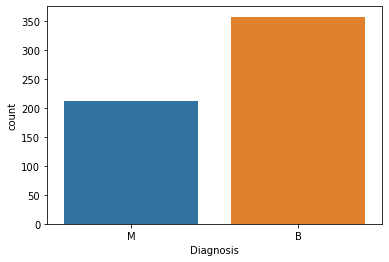

In [10]:
sns.countplot(data=dataset, x='Diagnosis')

### <span style='color:red '>3.2 Numerical  features</span>

In [11]:
### Numerical features 
numerical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print(numerical_feature)

['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension', 'Radius SE', 'texture SE', 'perimeter SE', 'area SE', 'smoothness SE', 'compactness SE', 'concavity SE', 'concave points SE', 'symmetry SE', 'fractal dimension SE', 'Worst Radius', 'Worst texture', 'Worst perimeter', 'Worst area', 'Worst smoothness', 'Worst compactness', 'Worst concavity', 'Worst concave points', 'Worst symmetry', 'Worst fractal dimension']


In [12]:
### Getting magnitude of feature
dataset[numerical_feature].max()-dataset[numerical_feature].min()

radius                       21.129000
texture                      29.570000
perimeter                   144.710000
area                       2357.500000
smoothness                    0.110770
compactness                   0.326020
concavity                     0.426800
concave points                0.201200
symmetry                      0.198000
fractal dimension             0.047480
Radius SE                     2.761500
texture SE                    4.524800
perimeter SE                 21.223000
area SE                     535.398000
smoothness SE                 0.029417
compactness SE                0.133148
concavity SE                  0.396000
concave points SE             0.052790
symmetry SE                   0.071068
fractal dimension SE          0.028945
Worst Radius                 28.110000
Worst texture                37.520000
Worst perimeter             200.790000
Worst area                 4068.800000
Worst smoothness              0.151430
Worst compactness        

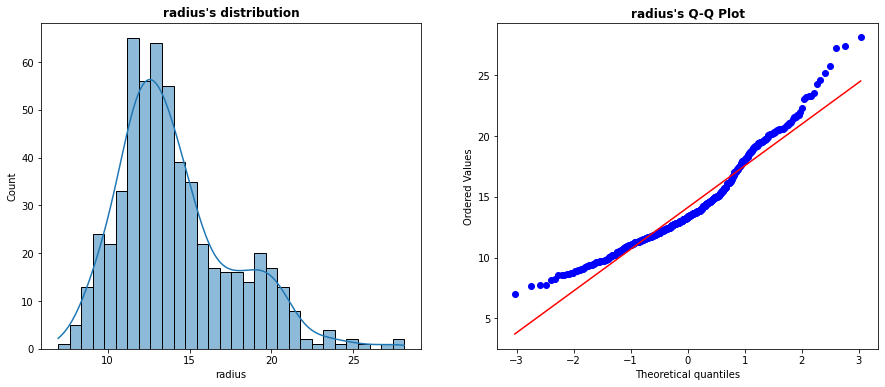

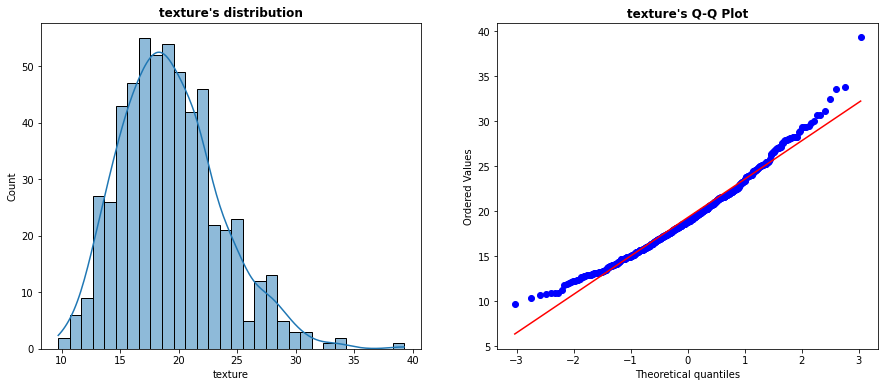

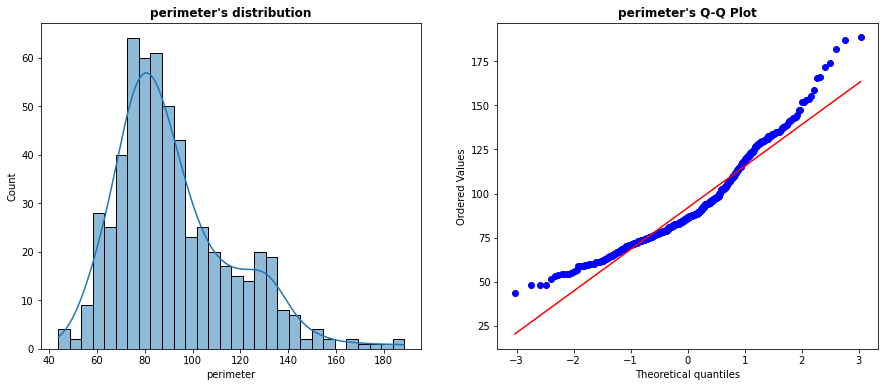

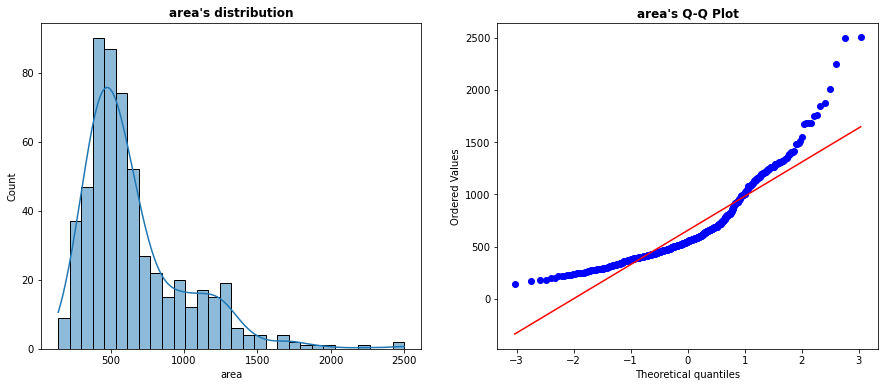

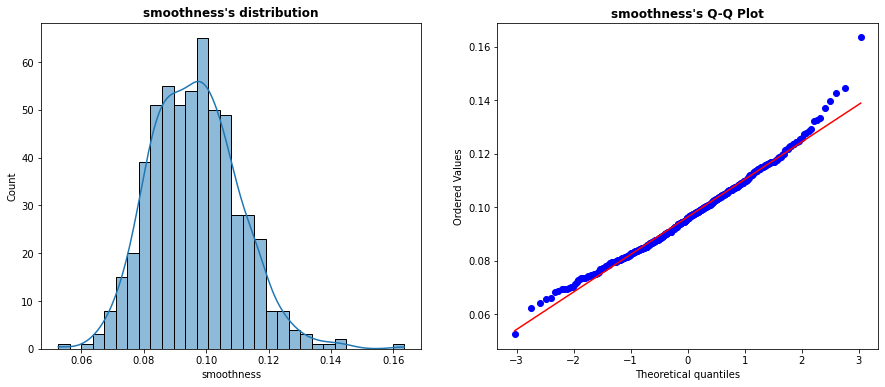

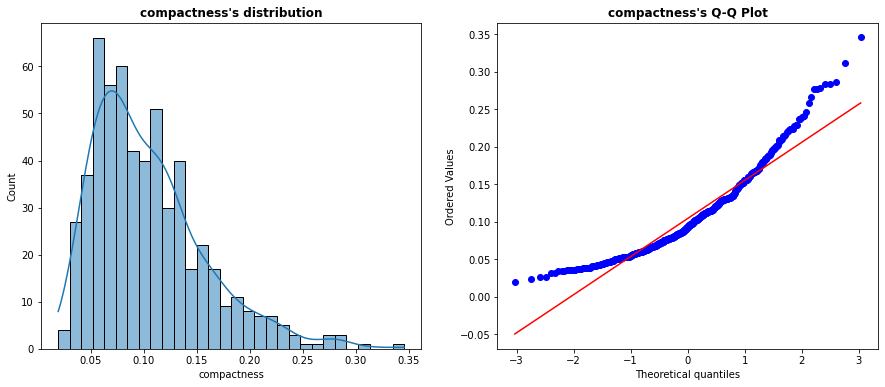

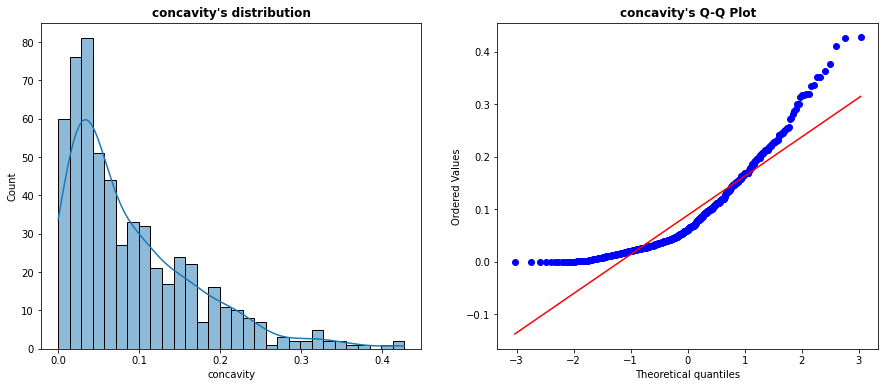

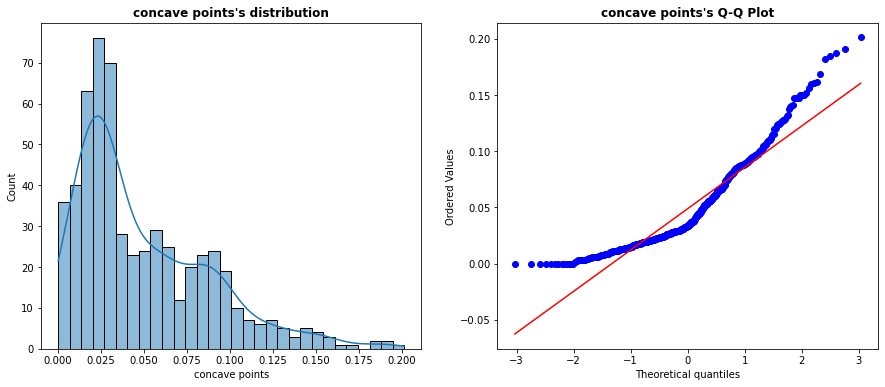

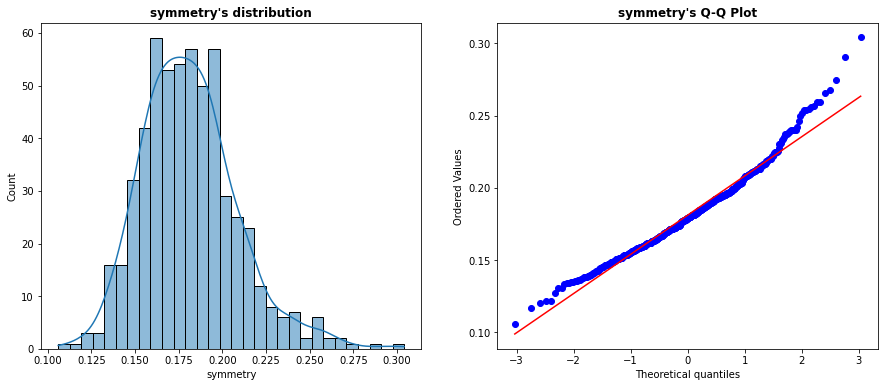

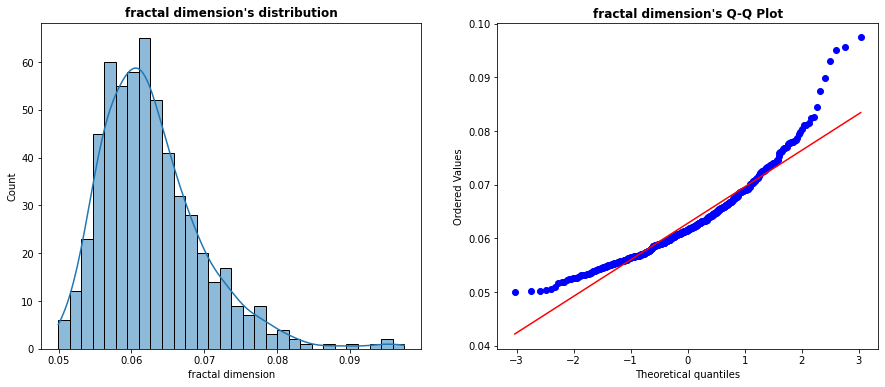

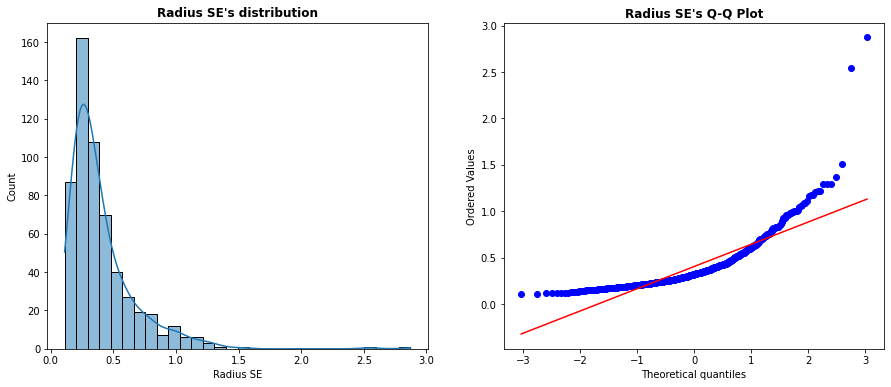

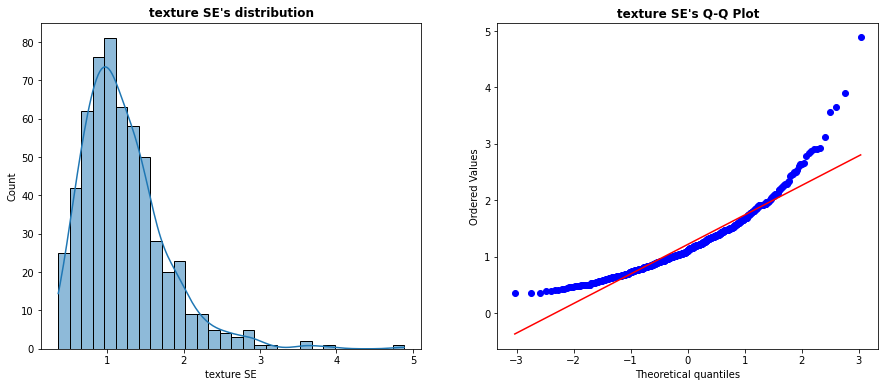

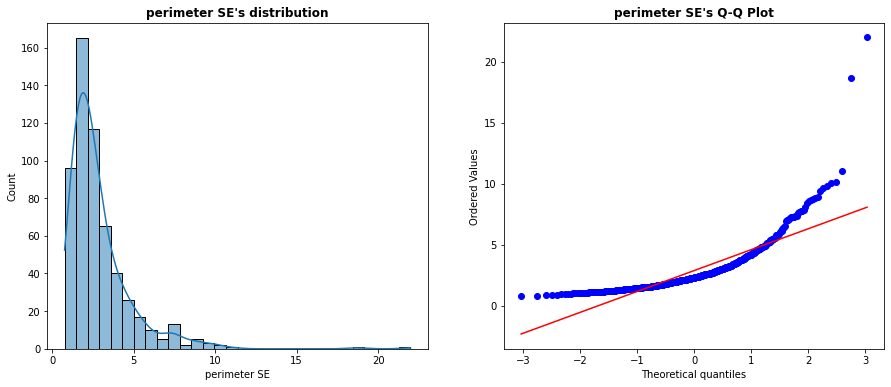

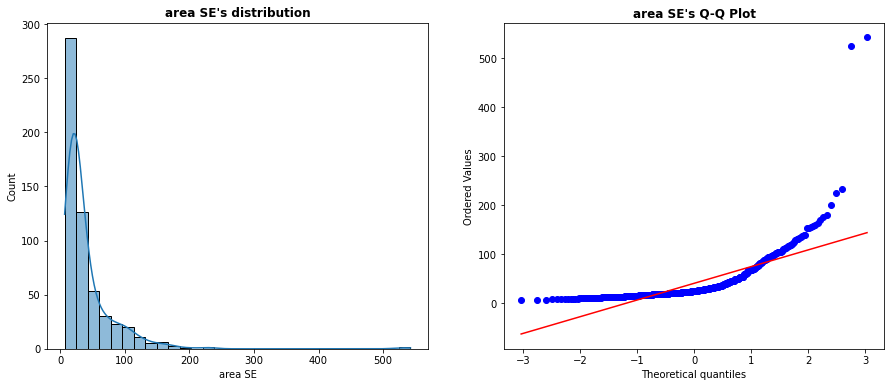

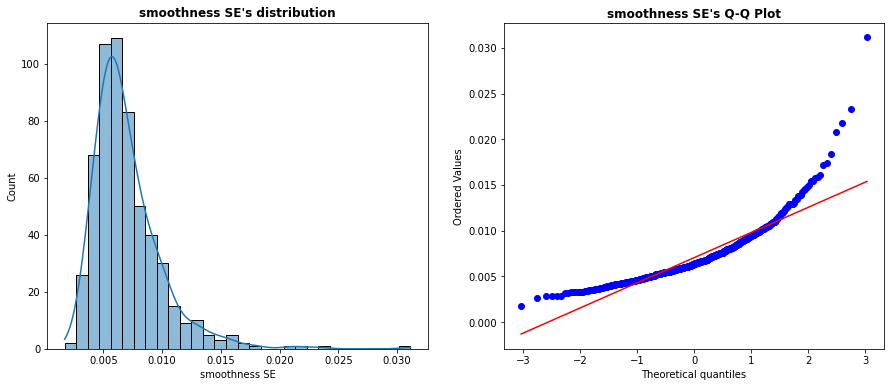

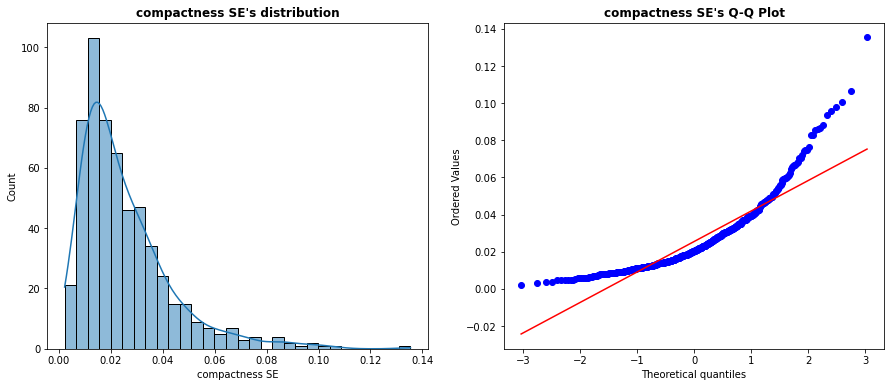

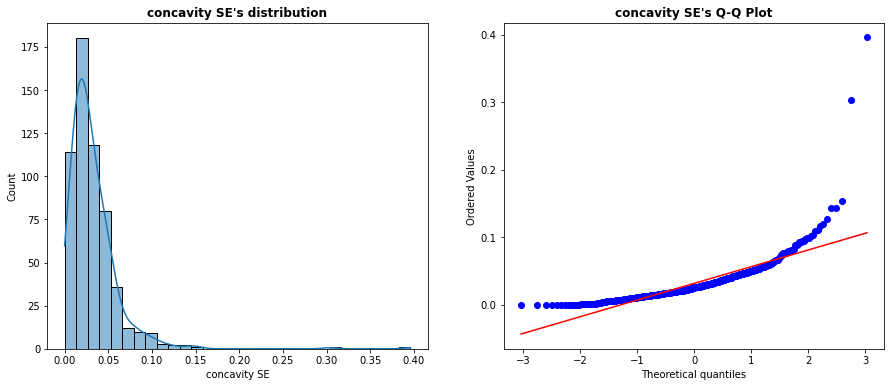

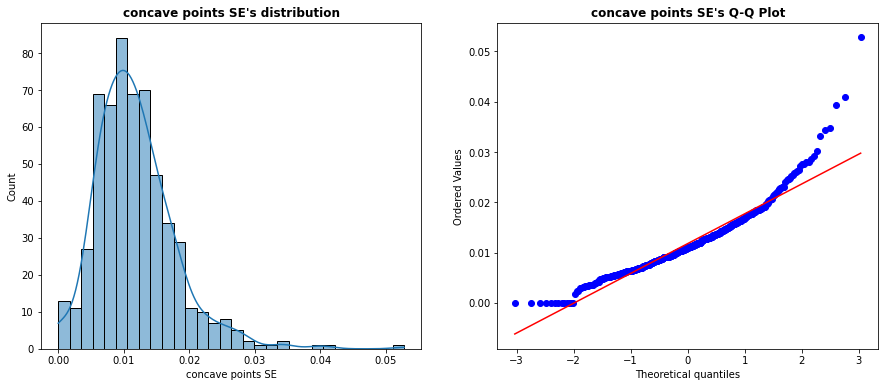

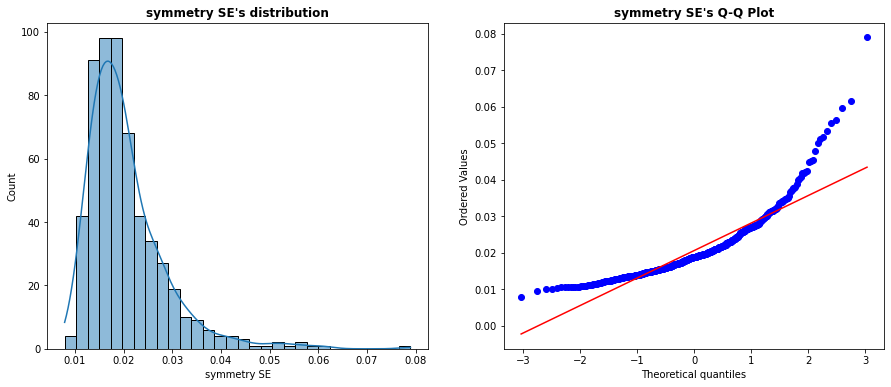

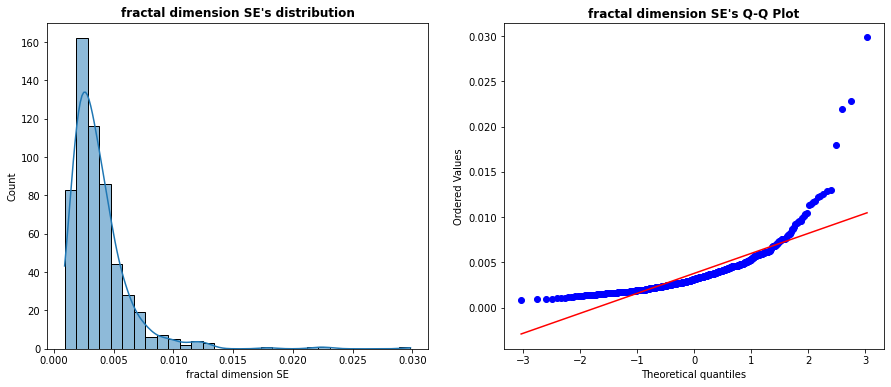

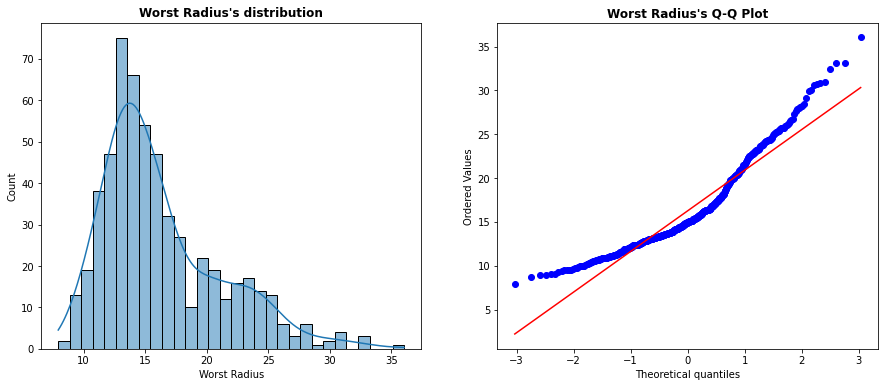

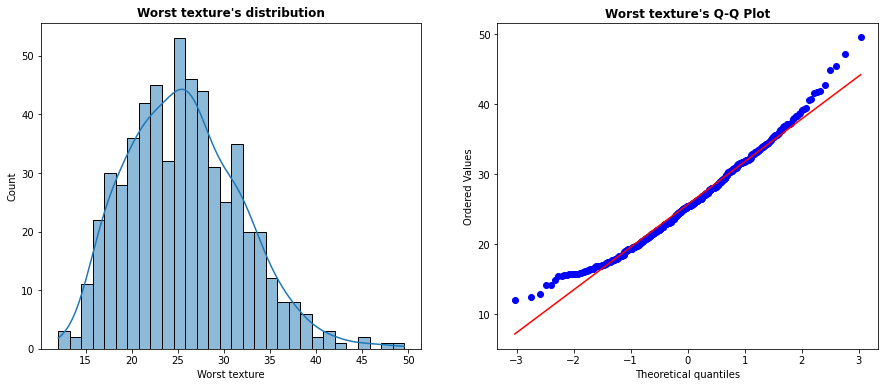

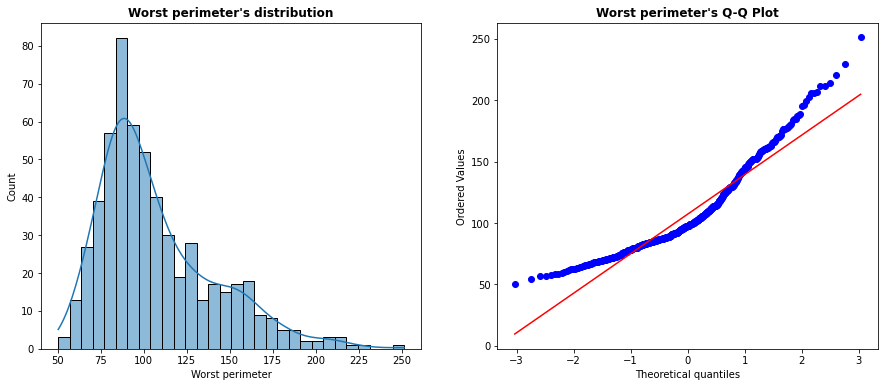

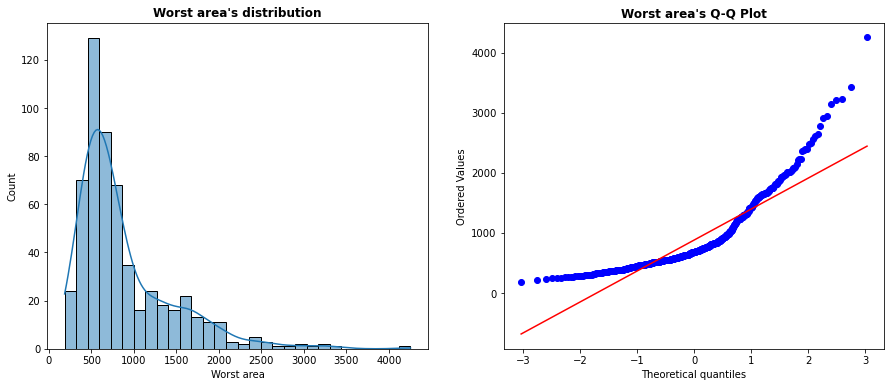

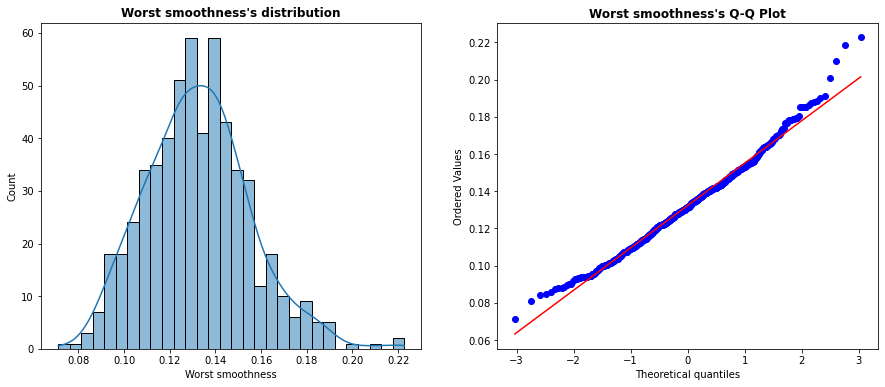

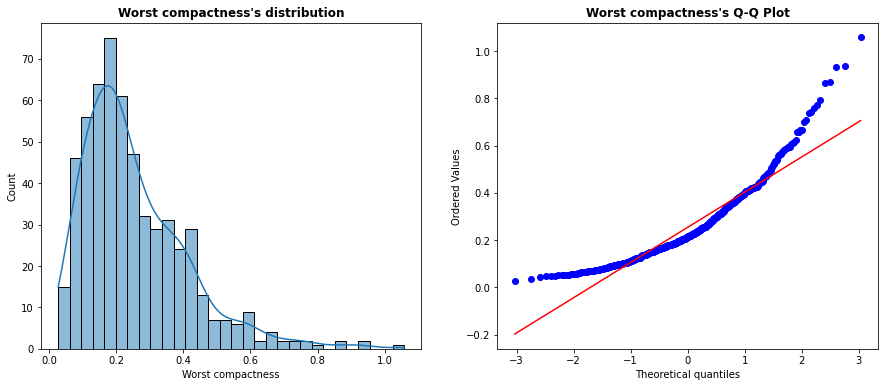

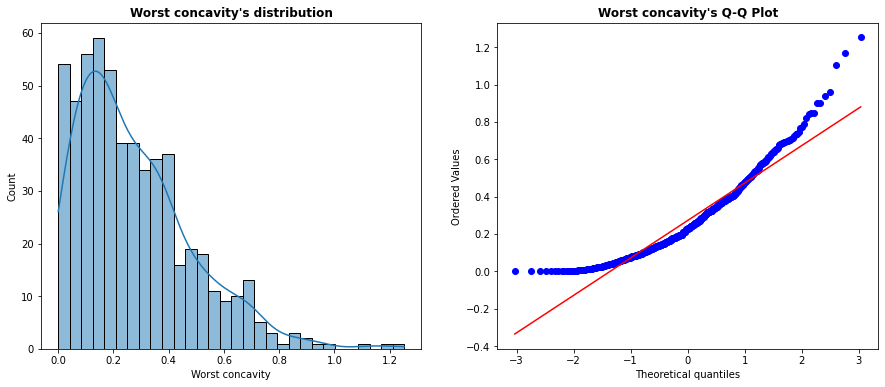

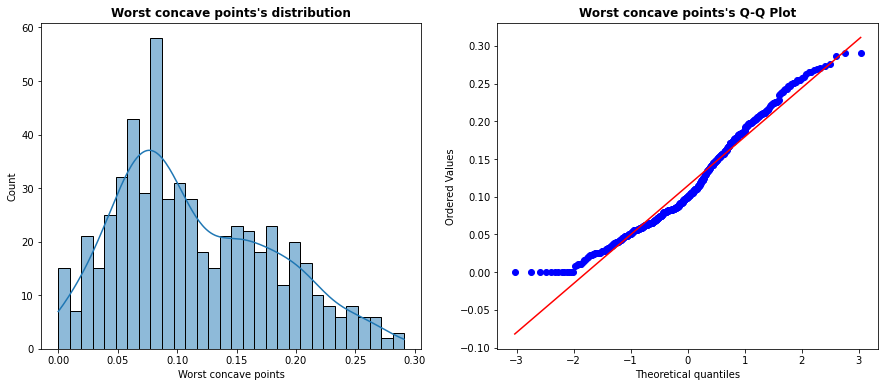

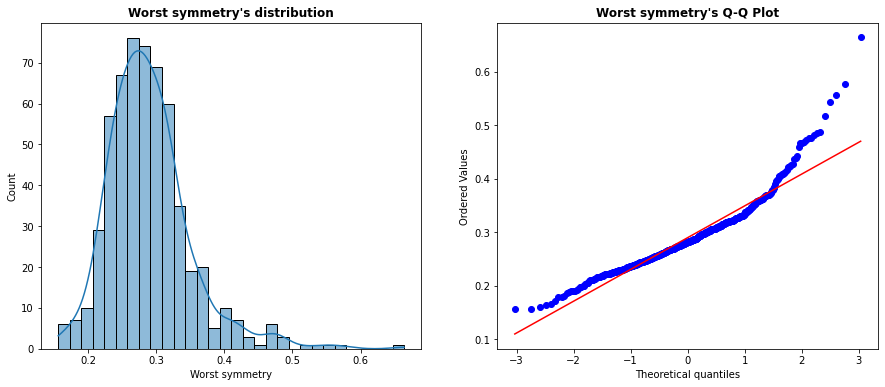

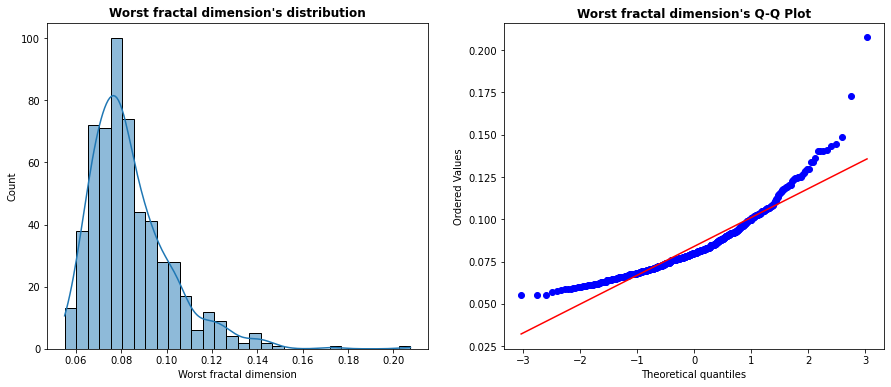

In [13]:
### Checking distribution of Continuous numerical features

for i in numerical_feature:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(dataset[i], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
    plt.show();

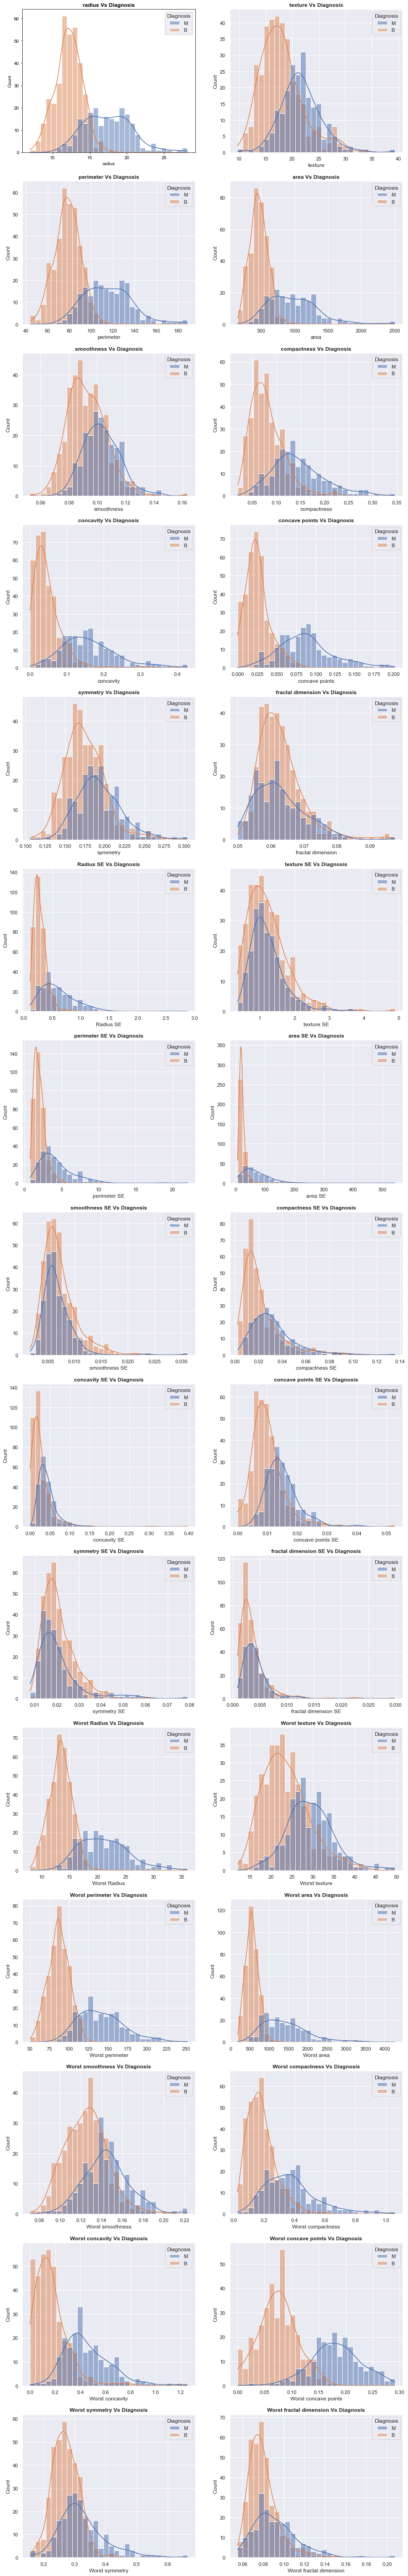

In [14]:
### Comparing Continuous numerical features with Classes

plt.figure(figsize=(15,110))
for i in enumerate(numerical_feature):
    plt.subplot(16, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.histplot(data=dataset, x=i[1], kde=True, bins=30, color='blue', hue='Diagnosis')
    plt.title("{} Vs Diagnosis".format(i[1]),fontweight="bold")

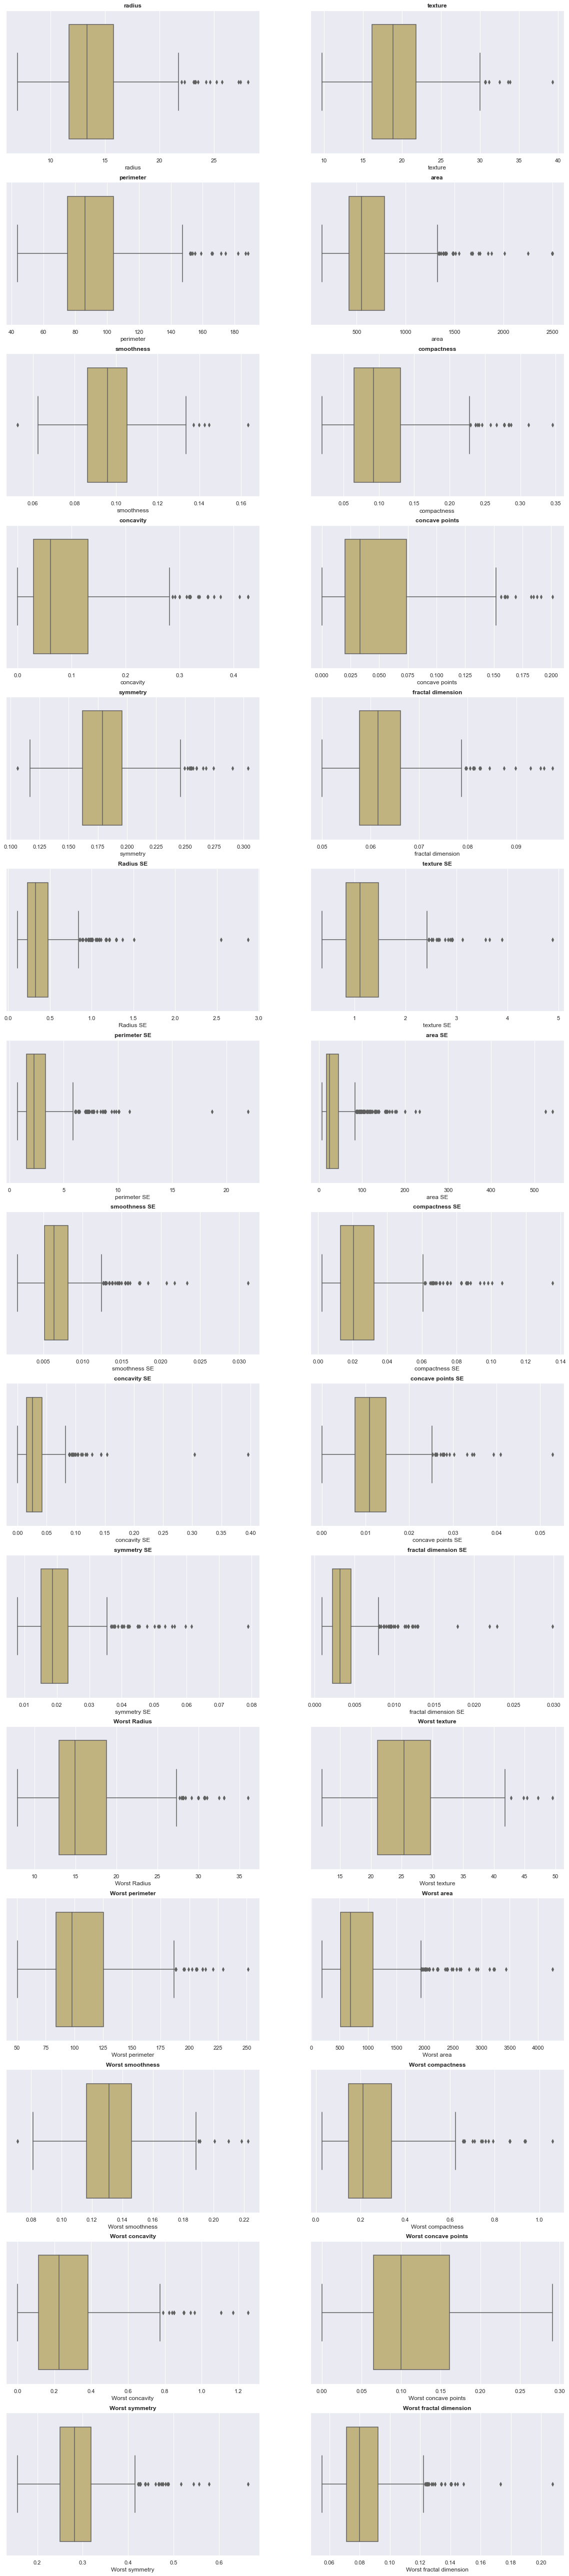

In [15]:
### Checking outliers in numerical features

plt.figure(figsize=(20,100))
for i in enumerate(numerical_feature):
    plt.subplot(16, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=i[1], color='y')
    plt.title("{}".format(i[1]), fontweight="bold")

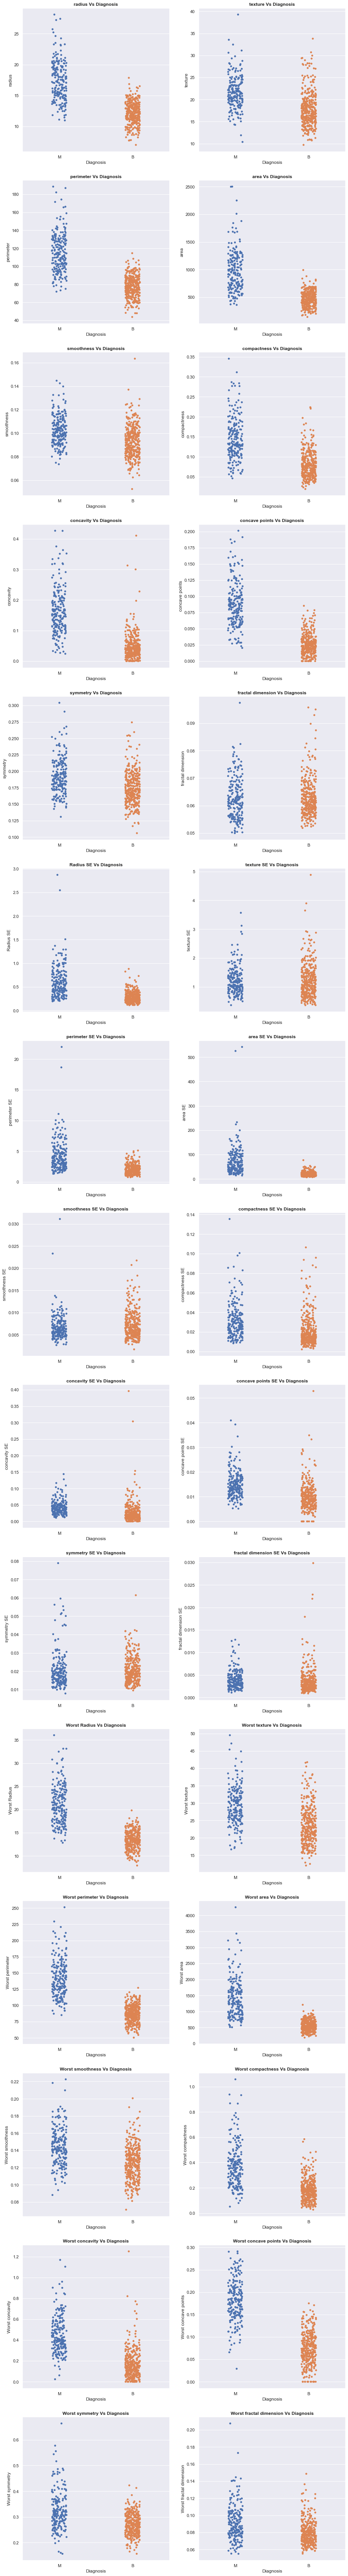

In [16]:
plt.figure(figsize=(15,130))
for i in enumerate(numerical_feature):
    plt.subplot(16, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,8)})
    sns.stripplot(data=dataset, y=i[1], x='Diagnosis')
    plt.title("{} Vs Diagnosis".format(i[1]), fontweight="bold")

In [17]:
corr= round(dataset[numerical_feature+['Diagnosis']].corr(),2)
corr

radius  texture  perimeter  area  smoothness  \
radius                     1.00     0.32       1.00  0.99        0.17   
texture                    0.32     1.00       0.33  0.32       -0.02   
perimeter                  1.00     0.33       1.00  0.99        0.21   
area                       0.99     0.32       0.99  1.00        0.18   
smoothness                 0.17    -0.02       0.21  0.18        1.00   
compactness                0.51     0.24       0.56  0.50        0.66   
concavity                  0.68     0.30       0.72  0.69        0.52   
concave points             0.82     0.29       0.85  0.82        0.55   
symmetry                   0.15     0.07       0.18  0.15        0.56   
fractal dimension         -0.31    -0.08      -0.26 -0.28        0.58   
Radius SE                  0.68     0.28       0.69  0.73        0.30   
texture SE                -0.10     0.39      -0.09 -0.07        0.07   
perimeter SE               0.67     0.28       0.69  0.73        0.30   
area SE                    0.74     0.26       0.74  0.80        0.25   
smoothness SE             -0.22     0.01      -0.20 -0.17        0.33   
compactness SE             0.21     0.19       0.25  0.21        0.32   
concavity SE               0.19     0.14       0.23  0.21        0.25   
concave points SE          0.38     0.16       0.41  0.37        0.38   
symmetry SE               -0.10     0.01      -0.08 -0.07        0.20   
fractal dimension SE      -0.04     0.05      -0.01 -0.02        0.28   
Worst Radius               0.97     0.35       0.97  0.96        0.21   
Worst texture              0.30     0.91       0.30  0.29        0.04   
Worst perimeter            0.97     0.36       0.97  0.96        0.24   
Worst area                 0.94     0.34       0.94  0.96        0.21   
Worst smoothness           0.12     0.08       0.15  0.12        0.81   
Worst compactness          0.41     0.28       0.46  0.39        0.47   
Worst concavity            0.53     0.30       0.56  0.51        0.43   
Worst concave points       0.74     0.30       0.77  0.72        0.50   
Worst symmetry             0.16     0.11       0.19  0.14        0.39   
Worst fractal dimension    0.01     0.12       0.05  0.00        0.50   

                         compactness  concavity  concave points  symmetry  \
radius                          0.51       0.68            0.82      0.15   
texture                         0.24       0.30            0.29      0.07   
perimeter                       0.56       0.72            0.85      0.18   
area                            0.50       0.69            0.82      0.15   
smoothness                      0.66       0.52            0.55      0.56   
compactness                     1.00       0.88            0.83      0.60   
concavity                       0.88       1.00            0.92      0.50   
concave points                  0.83       0.92            1.00      0.46   
symmetry                        0.60       0.50            0.46      1.00   
fractal dimension               0.57       0.34            0.17      0.48   
Radius SE                       0.50       0.63            0.70      0.30   
texture SE                      0.05       0.08            0.02      0.13   
perimeter SE                    0.55       0.66            0.71      0.31   
area SE                         0.46       0.62            0.69      0.22   
smoothness SE                   0.14       0.10            0.03      0.19   
compactness SE                  0.74       0.67            0.49      0.42   
concavity SE                    0.57       0.69            0.44      0.34   
concave points SE               0.64       0.68            0.62      0.39   
symmetry SE                     0.23       0.18            0.10      0.45   
fractal dimension SE            0.51       0.45            0.26      0.33   
Worst Radius                    0.54       0.69            0.83      0.19   
Worst texture                   0.25       0.30            0.29    

<AxesSubplot:>

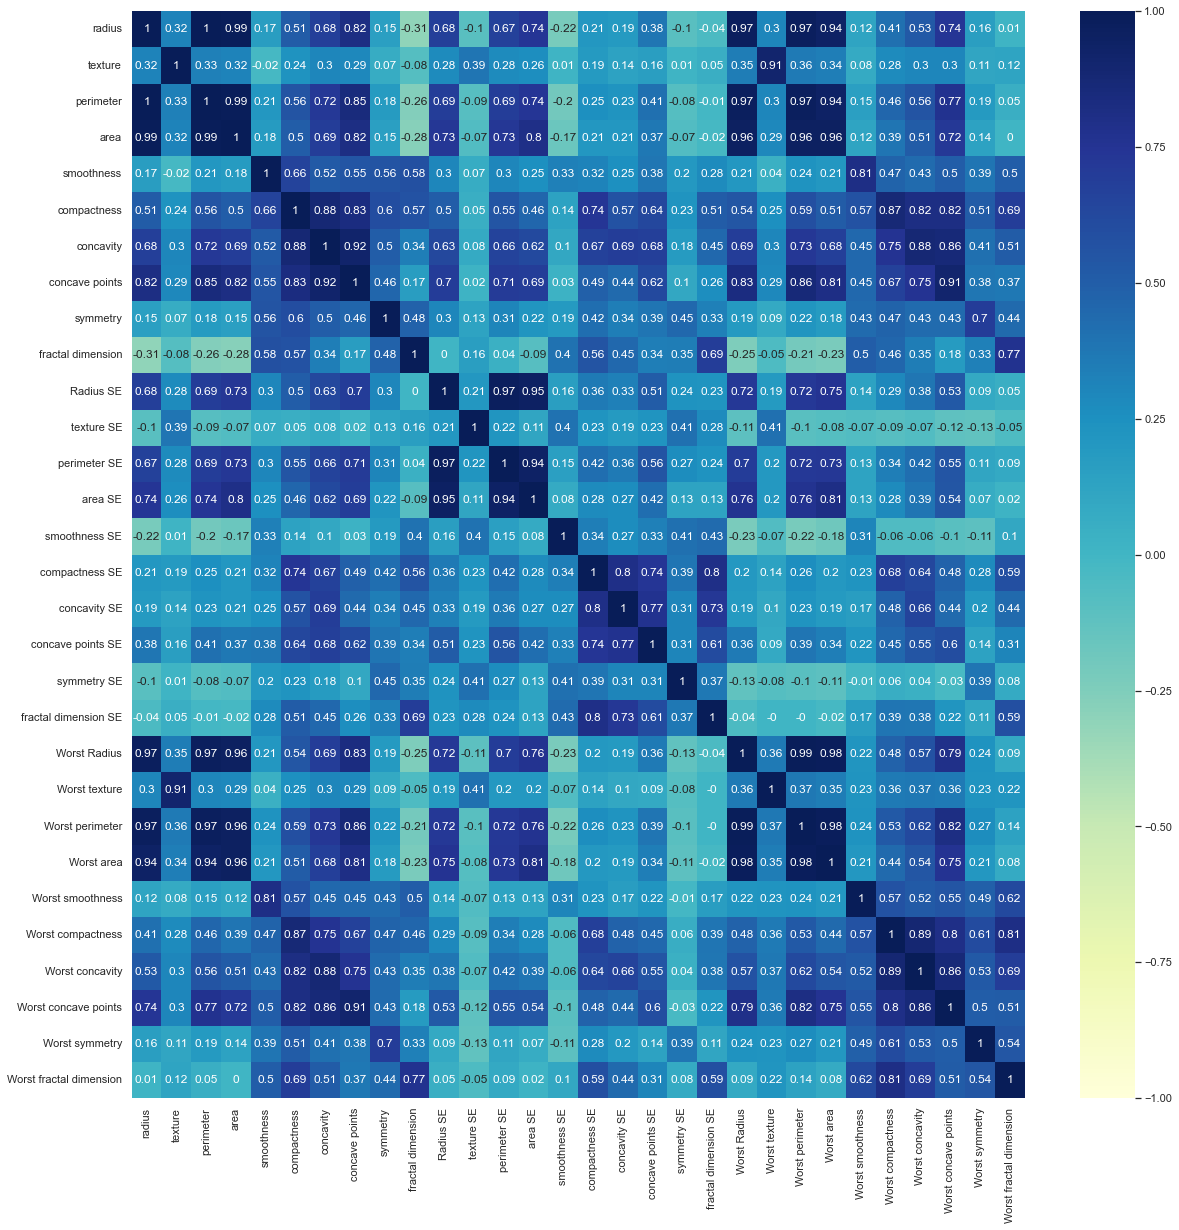

In [18]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(data=corr, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

In [19]:
data=dataset.copy()

In [20]:
data['Diagnosis']=data['Diagnosis'].replace('B','0')
data['Diagnosis']=data['Diagnosis'].replace('M','1')
data['Diagnosis']=data.Diagnosis.astype('int64')

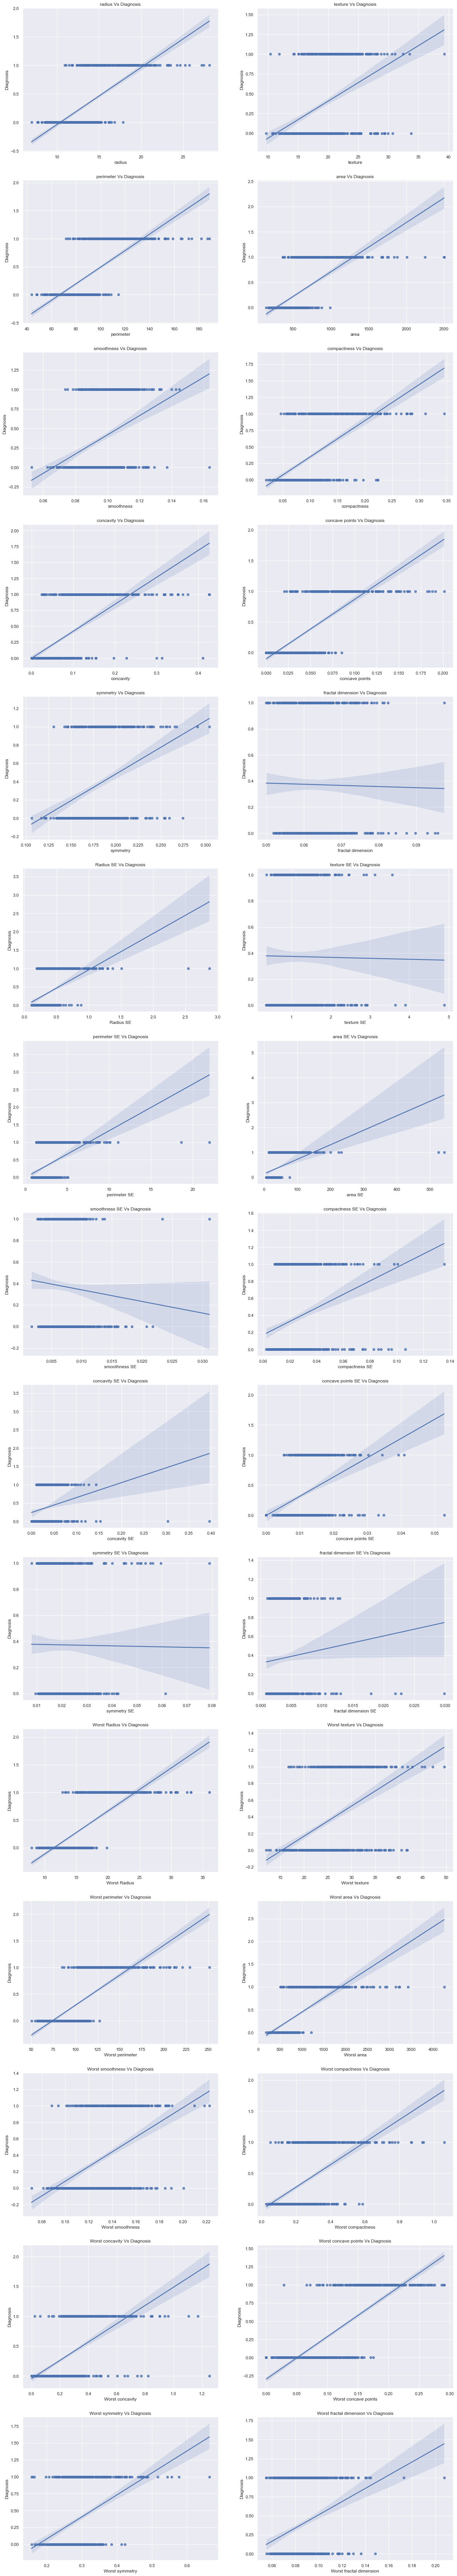

In [21]:
plt.figure(figsize=(20,130))
for i in enumerate(numerical_feature):
    plt.subplot(16, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=data, x=i[1], y='Diagnosis')
    plt.xlabel(i[1])
    plt.ylabel("Diagnosis")
    plt.title("{} Vs Diagnosis".format(i[1]))

## <span style='color:red'>5.0  Model Building</span>

### <span style='color:red'>5.1 Getting independent features in dataset(X) and dependent feature in series(y)</span>

In [75]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  Radius SE  texture SE  \
0         0.14710    0.2419            0.07871     1.0950      0.9053   
1         0.07017    0.1812            0.05667     0.5435      0.7339   
2         0.12790    0.2069            0.05999     0.7456      0.7869   
3         0.10520    0.2597            0.09744     0.4956      1.1560   
4         0.10430    0.1809            0.05883     0.7572      0.7813   

   perimeter SE  area SE  smoothness SE  compactness SE  concavity SE  \
0         8.589   153.40       0.006399         0.04904       0.05373   
1         3.398    74.08       0.005225         0.01308       0.01860   
2         4.585    94.03       0.006150         0.04006       0.03832   
3         3.445    27.23       0.009110         0.07458       0.05661   
4         5.438    94.44       0.011490         0.02461       0.05688   

   concave points SE  symmetry SE  fractal dimension SE  Worst Radius  \
0            0.01587      0.03003              0.006193         25.38   
1            0.01340      0.01389              0.003532         24.99   
2            0.02058      0.02250              0.004571         23.57   
3            0.01867      0.05963              0.009208         14.91   
4            0.01885      0.01756              0.005115         22.54   

   Worst texture  Worst perimeter  Worst area  Worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   Worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [76]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

### <span style='color:red '>5.2 Splitting data into Training and Test data</span>

In [77]:
### random state train test split will be same with all people using random_state=19

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
X_train.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
394  12.100    17.72      78.07   446.2     0.10290      0.09758    0.04783   
202  23.290    26.67     158.90  1685.0     0.11410      0.20840    0.35230   
221  13.560    13.90      88.59   561.3     0.10510      0.11920    0.07860   
103   9.876    19.40      63.95   298.3     0.10050      0.09697    0.06154   
513  14.580    13.66      94.29   658.8     0.09832      0.08918    0.08222   

     concave points  symmetry  fractal dimension  Radius SE  texture SE  \
394         0.03326    0.1937            0.06161     0.2841      1.6520   
202         0.16200    0.2200            0.06229     0.5539      1.5600   
221         0.04451    0.1962            0.06303     0.2569      0.4981   
103         0.03029    0.1945            0.06322     0.1803      1.2220   
513         0.04349    0.1739            0.05640     0.4165      0.6237   

     perimeter SE  area SE  smoothness SE  compactness SE  concavity SE  \
394         1.869    22.22       0.008146         0.01631       0.01843   
202         4.667    83.16       0.009327         0.05121       0.08958   
221         2.011    21.03       0.005851         0.02314       0.02544   
103         1.528    11.77       0.009058         0.02196       0.03029   
513         2.561    37.11       0.004953         0.01812       0.03035   

     concave points SE  symmetry SE  fractal dimension SE  Worst Radius  \
394           0.007513      0.02015              0.001798         13.56   
202           0.024650      0.02175              0.005195         25.12   
221           0.008360      0.01842              0.002918         14.98   
103           0.011120      0.01609              0.003570         10.76   
513           0.008648      0.01539              0.002281         16.76   

     Worst texture  Worst perimeter  Worst area  Worst smoothness  \
394          25.80            88.33       559.5            0.1432   
202          32.68           177.00      1986.0            0.1536   
221          17.13           101.10       686.6            0.1376   
103          26.83            72.22       361.2            0.1559   
513          17.24           108.50       862.0            0.1223   

     Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
394             0.1773           0.1603               0.06266          0.3049   
202             0.4167           0.7892               0.27330          0.3198   
221             0.2698           0.2577               0.09090          0.3065   
103             0.2302           0.2644               0.09749          0.2622   
513             0.1928           0.2492               0.09186          0.2626   

     Worst fractal dimension  
394                  0.07081  
202                  0.08762  
221                  0.08177  
103                  0.08490  
513                  0.07048

In [78]:
y_train.head()

394    0
202    1
221    0
103    0
513    0
Name: Diagnosis, dtype: int64

In [79]:
X_test.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
37   13.030    18.42      82.61   523.8     0.08983      0.03766    0.02562   
129  19.790    25.12     130.40  1192.0     0.10150      0.15890    0.25450   
62   14.250    22.15      96.42   645.7     0.10490      0.20080    0.21350   
544  13.870    20.70      89.77   584.8     0.09578      0.10180    0.03688   
553   9.333    21.94      59.01   264.0     0.09240      0.05605    0.03996   

     concave points  symmetry  fractal dimension  Radius SE  texture SE  \
37          0.02923    0.1467            0.05863     0.1839       2.342   
129         0.11490    0.2202            0.06113     0.4953       1.199   
62          0.08653    0.1949            0.07292     0.7036       1.268   
544         0.02369    0.1620            0.06688     0.2720       1.047   
553         0.01282    0.1692            0.06576     0.3013       1.879   

     perimeter SE  area SE  smoothness SE  compactness SE  concavity SE  \
37          1.170    14.16       0.004352        0.004899       0.01343   
129         2.765    63.33       0.005033        0.031790       0.04755   
62          5.373    60.78       0.009407        0.070560       0.06899   
544         2.076    23.12       0.006298        0.021720       0.02615   
553         2.121    17.86       0.010940        0.018340       0.03996   

     concave points SE  symmetry SE  fractal dimension SE  Worst Radius  \
37            0.011640      0.02671              0.001777        13.300   
129           0.010430      0.01578              0.003224        22.630   
62            0.018480      0.01700              0.006113        17.670   
544           0.009061      0.01490              0.003599        15.050   
553           0.012820      0.03759              0.004623         9.845   

     Worst texture  Worst perimeter  Worst area  Worst smoothness  \
37           22.81            84.46       545.9           0.09701   
129          33.58           148.70      1589.0           0.12750   
62           29.51           119.10       959.5           0.16400   
544          24.75            99.17       688.6           0.12640   
553          25.05            62.86       295.8           0.11030   

     Worst compactness  Worst concavity  Worst concave points  Worst symmetry  \
37             0.04619          0.04833               0.05013          0.1987   
129            0.38610          0.56730               0.17320          0.3305   
62             0.62470          0.69220               0.17850          0.2844   
544            0.20370          0.13770               0.06845          0.2249   
553            0.08298          0.07993               0.02564          0.2435   

     Worst fractal dimension  
37                   0.06169  
129                  0.08465  
62                   0.11320  
544                  0.08492  
553                  0.07393

In [80]:
y_test.head()

37     0
129    1
62     1
544    0
553    0
Name: Diagnosis, dtype: int64

In [81]:
### both will have same shape
X_train.shape, y_train.shape

((426, 30), (426,))

In [82]:
### both will have same shape
X_test.shape, y_test.shape

((143, 30), (143,))

### <span style='color:red '>5.3 Standardisation/ Feature scaling the dataset</span>

In [83]:
### Creating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [84]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.56320634, -0.33858826, -0.56197368, ..., -0.79907328,
         0.19452361, -0.75298811],
       [ 2.64669082,  1.73717104,  2.80948066, ...,  2.40906656,
         0.42875344,  0.16254587],
       [-0.14439938, -1.2245548 , -0.12317992, ..., -0.36896566,
         0.21967581, -0.15606649],
       ...,
       [-0.16161063, -1.50054962, -0.24414017, ..., -1.41681992,
        -1.03479003, -1.23716997],
       [-0.15013646, -1.11786773, -0.17031271, ...,  0.20826801,
         0.08133872, -0.65604281],
       [-0.83858626, -1.18512697, -0.84685594, ..., -1.15607479,
        -0.54903822, -0.78730021]])

In [85]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[-2.96432044e-01, -1.76238373e-01, -3.72608310e-01, ...,
        -9.89910694e-01, -1.47495347e+00, -1.24969661e+00],
       [ 1.64270154e+00,  1.37768200e+00,  1.62073330e+00, ...,
         8.84499533e-01,  5.96958763e-01,  7.88828001e-04],
       [ 5.35299342e-02,  6.88854610e-01,  2.03412776e-01, ...,
         9.65220864e-01, -1.27738917e-01,  1.55572607e+00],
       ...,
       [-6.34919859e-01, -3.98889650e-01, -6.67501074e-01, ...,
        -3.61350443e-01,  2.76268250e-01, -7.93291208e-01],
       [-8.21375011e-01,  2.36337776e+00, -8.70630885e-01, ...,
        -1.75341264e+00, -2.13677066e+00, -1.39348064e+00],
       [ 2.31379464e-01, -5.82113097e-01,  2.96009938e-01, ...,
         1.33379751e+00,  1.03712221e+00,  1.19081961e+00]])

## <span style='color:red '>6.0 Model</span>
### <span style='color:red '>1.0 Logistic Regression</span>

In [89]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression()
logistic_reg

LogisticRegression()

In [90]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression()

### <span style='color:red '>1.1 Using Above Model to get prediction for test data</span>

In [92]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

### <span style='color:red '>1.2.0 Performance Metrics</span>

### <span style='color:red '>1.2.1 Confusion Matrix</span>

In [94]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[83,  2],
       [ 3, 55]], dtype=int64)

In [95]:
truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]

### <span style='color:red '>1.2.2 Accuracy Score</span>

In [97]:
### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
accuracy

0.965

In [98]:
### manual calcualtion for accuracy
accuracy_manual=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual))

Accuracy of our model is 0.965


### <span style='color:red '>1.2.3 Precision Score</span>

In [99]:
precision_manual=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual))

Precision of our model is 0.9765


### <span style='color:red '>1.2.4 Recall Score</span>

In [100]:
recall_manual=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual))

Recall of our model is 0.9651


### <span style='color:red '>1.2.5 F-1 Score</span>

1. Giving equal importance to falsely positive and falsely negative

In [101]:
f1_score=2*(precision_manual*recall_manual)/(precision_manual+recall_manual)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.9708 


### <span style='color:red '>1.2.6 Classification Report</span>

In [96]:
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        85
           1       0.96      0.95      0.96        58

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



## <span style='color:red '>7.0 Saving the Model</span>

In [102]:
### Writing model to a file that will be used while deployment
with open('model_Logistic_regression_breast_cancer.sav','wb') as f:
    pickle.dump(logistic_reg,f)

## <span style='color:red '>8.0 For Deployment</span>

In [42]:
### Creating copy of dataset
data1=dataset[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave points', 'symmetry', 'fractal dimension','Diagnosis']].copy()
data1.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension Diagnosis  
0         0.14710    0.2419            0.07871         M  
1         0.07017    0.1812            0.05667         M  
2         0.12790    0.2069            0.05999         M  
3         0.10520    0.2597            0.09744         M  
4         0.10430    0.1809            0.05883         M

In [43]:
data1['Diagnosis']=data1['Diagnosis'].replace('B','0')
data1['Diagnosis']=data1['Diagnosis'].replace('M','1')
data1['Diagnosis']=data1.Diagnosis.astype('int64')

In [44]:
X1=data1.iloc[:,:-1]
y1=data1.iloc[:,-1]
X1.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   concave points  symmetry  fractal dimension  
0         0.14710    0.2419            0.07871  
1         0.07017    0.1812            0.05667  
2         0.12790    0.2069            0.05999  
3         0.10520    0.2597            0.09744  
4         0.10430    0.1809            0.05883

In [45]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [46]:
### random state train test split will be same with all people using random_state=19

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=19)
X_train1.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
394  12.100    17.72      78.07   446.2     0.10290      0.09758    0.04783   
202  23.290    26.67     158.90  1685.0     0.11410      0.20840    0.35230   
221  13.560    13.90      88.59   561.3     0.10510      0.11920    0.07860   
103   9.876    19.40      63.95   298.3     0.10050      0.09697    0.06154   
513  14.580    13.66      94.29   658.8     0.09832      0.08918    0.08222   

     concave points  symmetry  fractal dimension  
394         0.03326    0.1937            0.06161  
202         0.16200    0.2200            0.06229  
221         0.04451    0.1962            0.06303  
103         0.03029    0.1945            0.06322  
513         0.04349    0.1739            0.05640

In [47]:
y_train1.head()

394    0
202    1
221    0
103    0
513    0
Name: Diagnosis, dtype: int64

In [48]:
X_test1.head()

radius  texture  perimeter    area  smoothness  compactness  concavity  \
37   13.030    18.42      82.61   523.8     0.08983      0.03766    0.02562   
129  19.790    25.12     130.40  1192.0     0.10150      0.15890    0.25450   
62   14.250    22.15      96.42   645.7     0.10490      0.20080    0.21350   
544  13.870    20.70      89.77   584.8     0.09578      0.10180    0.03688   
553   9.333    21.94      59.01   264.0     0.09240      0.05605    0.03996   

     concave points  symmetry  fractal dimension  
37          0.02923    0.1467            0.05863  
129         0.11490    0.2202            0.06113  
62          0.08653    0.1949            0.07292  
544         0.02369    0.1620            0.06688  
553         0.01282    0.1692            0.06576

In [49]:
y_test1.head()

37     0
129    1
62     1
544    0
553    0
Name: Diagnosis, dtype: int64

In [50]:
### Creating a standard scaler object
scaler1=StandardScaler()
scaler1

StandardScaler()

In [51]:
### using fit_transform to Standardize the train data
X_train1=scaler1.fit_transform(X_train1)
X_train1

array([[-0.56320634, -0.33858826, -0.56197368, ..., -0.4055683 ,
         0.48908151, -0.18483989],
       [ 2.64669082,  1.73717104,  2.80948066, ...,  3.00197686,
         1.507381  , -0.08821199],
       [-0.14439938, -1.2245548 , -0.12317992, ..., -0.10779851,
         0.58587804,  0.01694191],
       ...,
       [-0.16161063, -1.50054962, -0.24414017, ..., -1.16894417,
        -1.7256231 , -1.35858472],
       [-0.15013646, -1.11786773, -0.17031271, ..., -0.0204527 ,
         0.28774473, -0.74613433],
       [-0.83858626, -1.18512697, -0.84685594, ..., -0.8965576 ,
        -0.46726821, -0.29567778]])

In [52]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test1=scaler1.transform(X_test1)
X_test1

array([[-0.29643204, -0.17623837, -0.37260831, ..., -0.51223605,
        -1.33069325, -0.60829747],
       [ 1.64270154,  1.377682  ,  1.6207333 , ...,  1.755314  ,
         1.51512473, -0.25304783],
       [ 0.05352993,  0.68885461,  0.20341278, ...,  1.00440475,
         0.53554384,  1.4223095 ],
       ...,
       [-0.63491986, -0.39888965, -0.66750107, ..., -0.68242803,
         0.24902612, -0.81860526],
       [-0.82137501,  2.36337776, -0.87063089, ..., -1.28590815,
        -2.90654076, -1.12127796],
       [ 0.23137946, -0.5821131 ,  0.29600994, ...,  1.0758695 ,
         1.34089097,  0.67770625]])

In [53]:
logistic_reg1=LogisticRegression()
logistic_reg1

LogisticRegression()

In [54]:
### Passing independant and dependant training data to the model
logistic_reg1.fit(X_train1,y_train1)

LogisticRegression()

In [55]:
logistic_reg_pred1=logistic_reg1.predict(X_test1)
logistic_reg_pred1

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [56]:
confusion_mat1=confusion_matrix(y_test1, logistic_reg_pred1)
confusion_mat1

array([[82,  3],
       [ 8, 50]], dtype=int64)

In [57]:
truly_positive1=confusion_mat1[0][0]
falsely_positive1=confusion_mat1[0][1]
falsely_negative1=confusion_mat1[1][0]
truly_negative1=confusion_mat1[1][1]

In [58]:
### accuracy using accuracy_score
accuracy1=round(accuracy_score(y_test1, logistic_reg_pred1),4)
accuracy1

0.9231

In [90]:
### Writing model to a file that will be used while deployment
with open('model.sav','wb') as f:
    pickle.dump(logistic_reg1,f)

In [91]:
### Writing model to a file that will be used while deployment
with open('scalar.sav','wb') as f:
    pickle.dump(scaler1,f)